In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('F:\\Data Science\\Data sets\\Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first= True)
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [6]:
data['Tax'] = pd.cut(data['Taxable.Income'], bins = [10000, 30000, 100000], labels = ['Risky', 'Good'])

In [7]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


#### if taxable income is <= 30000 (=0) then its Risky and if it is any other then its good (=1)

In [8]:
data = pd.get_dummies(data, columns=['Tax'], drop_first = True)
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


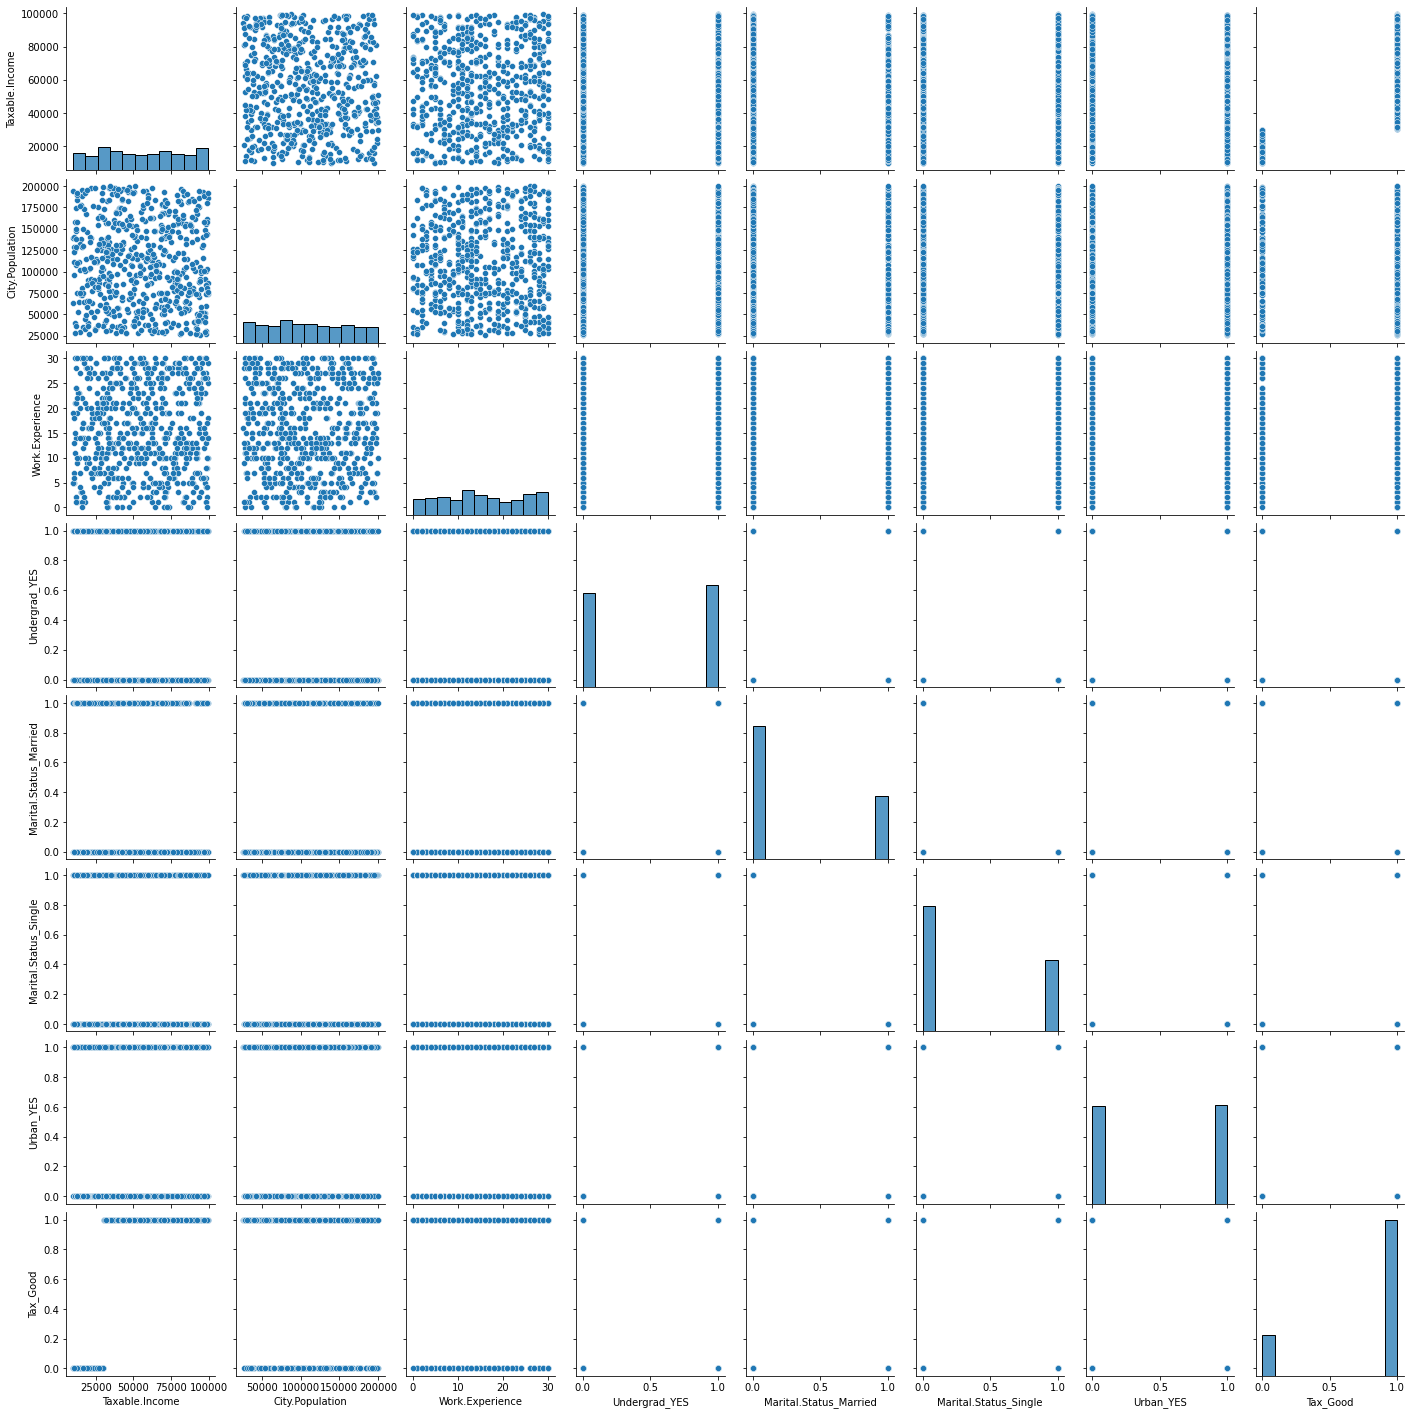

In [9]:
sns.pairplot(data)

C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tax_Good', ylabel='Density'>

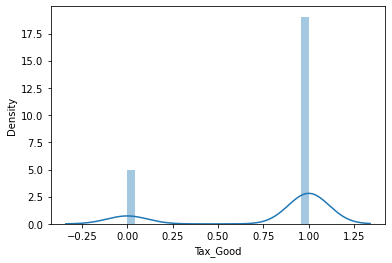

In [10]:
sns.distplot(data['Tax_Good'])

C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tax_Good'>

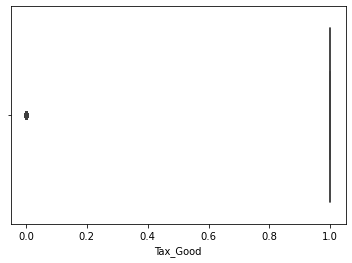

In [11]:
sns.boxplot(data['Tax_Good'])

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
data_norm = norm_func(data.iloc[:,1:])
data_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [14]:
# Declaring features & target
x = data_norm.drop(['Tax_Good'], axis=1)
y = data_norm['Tax_Good']

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
data_norm["income"]="<=30000"
data_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data_norm.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [17]:
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [19]:
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [20]:
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [22]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [23]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [24]:
model.n_outputs_

1

In [25]:
prediction = model.predict(x_train)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [27]:
np.mean(prediction == y_train)

0.9979166666666667

In [28]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [29]:
pred_test = model.predict(x_test)

In [30]:
acc_test =accuracy_score(y_test,pred_test)

In [35]:
from sklearn.tree import export_graphviz

In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [38]:
from sklearn.externals.six import StringIO

In [39]:
tree = model.estimators_[5]

In [40]:
dot_data = StringIO()

In [41]:
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [42]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=bd369fd83417afcec05a6255e75423d3678a807236df885d3bdc188e9839771b
  Stored in directory: c:\users\shriprada\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pydotplus

In [44]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [45]:
graph